# Hypotheses Testing Project

This study is conducted for the benefice of the marketing department at **an online store**. We have compiled a list of hypotheses that may help boost revenue.
The goal from this study will be to prioritize these hypotheses, launch an A/B test, and analyze the results.

The study will be conducted in two big parts : The first part will consist of prioritizing the hypotheses. The second part will consist of an A/B testing analysis. For this study we have the following datasets :
* A dataset of hypotheses with the reach, impact, confidence and effort parameters,
* A dataset of orders from each group,
* A dataset of visitors from each group.

# Table of contents  

1. [Data examination](#1)  
2. [Part 1 : Prioritizing Hypotheses](#2)   
3. [Part 2 :  A/B Test Analysis](#3)    
    3.1. [Cumulative Revenue](#31)    
    3.2. [Cumulative Average Order Size](#32)     
    3.3. [Relative Difference of the Cumulative Average Order Size](#33)     
    3.4. [Daily Conversion Rate Per Group](#34)    
    3.5. [Orders Per User](#35)   
    3.6. [Order Size Per User](#36)  
    3.7. [Comparison of Conversion Rates - Raw Data](#37)    
    3.8. [Comparison of Average Order Size - Raw Data](#38)    
    3.9. [Comparison of Conversion Rates - Filtered Data](#39)   
    3.10. [Comparison of Average Order Size - Filtered Data](#310)    
    3.11. [Final Conclusion](#311)    
   

## 1. Data examination  <a name="1"></a>

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import scipy.stats as stats

from io import BytesIO
from scipy.stats import ttest_ind
from IPython.display import display_html 
from pandas.plotting import register_matplotlib_converters
from functools import reduce
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

In [4]:
# Opening the data files, taking into consideration the separator
data_url1 = 'https://drive.google.com/file/d/1OPMTBZrMVz2TSfyA5zXkmM2O47GoJxHU/view?usp=sharing'
data_url1 = 'https://drive.google.com/uc?id=' + data_url1.split('/')[-2] 
hypotheses = pd.read_csv(data_url1, sep=';')

data_url2 = 'https://drive.google.com/file/d/1eU3tXIzU8pssyJmyRADElMun8J1hepZU/view?usp=sharing'
data_url2 = 'https://drive.google.com/uc?id=' + data_url2.split('/')[-2] 
orders = pd.read_csv(data_url2,
                     parse_dates = ['date'])

data_url3 = 'https://drive.google.com/file/d/1HmNej3-blWOKePOm7FdtMTxFDTN8Vgv7/view?usp=sharing'
data_url3 = 'https://drive.google.com/uc?id=' + data_url3.split('/')[-2] 
visits = pd.read_csv(data_url3,
                     parse_dates = ['date'])


# We print informations about the dataset to examine
print(' ')
print('------------------------------------------ Informations about the Hypotheses dataset ------------------------------------------')
print(' ')
display (hypotheses.info())
print(' ')
print('-------------------------------------------- Informations about the orders dataset --------------------------------------------')
print(' ')
display (orders.info())
print(' ')
print('-------------------------------------------- Informations about the visits dataset --------------------------------------------')
print(' ')
display (visits.info())
print(' ')


# Print a few lines of the datasets to examine data
print('-------------------------------------------------- Samples of the datasets -------------------------------------------------')
display(hypotheses.head(10))
display(orders.head(10))
display(visits.head(10))

 
------------------------------------------ Informations about the Hypotheses dataset ------------------------------------------
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

 
-------------------------------------------- Informations about the orders dataset --------------------------------------------
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


None

 
-------------------------------------------- Informations about the visits dataset --------------------------------------------
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

 
-------------------------------------------------- Samples of the datasets -------------------------------------------------


,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
6,398296753,2900797465,2019-08-15,30.6,B
7,2626614568,78758296,2019-08-15,20.1,A
8,1576988021,295230930,2019-08-15,215.9,A
9,1506739906,1882260405,2019-08-15,30.5,B


,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


**Observations :**

From the first observation of the data informations, and the first lines of the data, we can draw the following remarks :  

- The first dataset, which we named **'hypotheses'**, contains 9 rows of data with information on hypotheses we want to test. The data is separated into the following five columns :
    - **hypothesis** : brief descriptions of the hypotheses;
    - **reach** :  user reach, on a scale of one to ten;
    - **impact** : impact on users, on a scale of one to ten;
    - **confidence** : confidence in the hypothesis, on a scale of one to ten;
    - **effort** : the resources required to test a hypothesis, on a scale of one to ten. The higher the Effort value, the more resource-intensive the test. 
    
      
- The second dataset, which we named **'orders'**, contains 1197 rows of data on orders, divided into 5 columns :
    - **transactionId** : order identifier;
    - **VisitorId** : identifier of the user who placed the order;
    - **date** : of the order;
    - **revenue** : from the order;
    - **group** : the A/B test group that the user belongs to.  

  
- The third dataset, which we named **'visits'**, contains 62 rows of data on on marketing visits, divided into 3 columns :
    - **date** : date of the visit;
    - **group** : A/B test group;
    - **visits** : the number of visits on the date specified in the A/B test group specified.

  
- None of the three datasets is missing any values.

**Let's make sure that there are no mistakes in our dataset and that the users are unique to each group.**

In [5]:
# Data slices of each group fpor the orders dataset
A = orders.query('group == "A"')
B = orders.query('group == "B"')

print('-------------------------------------- Initial Numbers ----------------------------------------------------')
print('')
print('The number of unique visitors in group A :', A.visitorId.nunique(), 'visitors.')
print('')
print('The number of unique visitors in group B :', B.visitorId.nunique(), 'visitors.')
print('')
print('-----------------------------------------------------------------------------------------------------------')
print('')
print('The number of visitors present in both groups :',len(list(reduce(set.intersection, map(set, [A.visitorId, B.visitorId])))) , 'visitors.')
print('')
print('The ratio of erronous visitors is : {:.2%}'.format(len(list(reduce(set.intersection, map(set, [A.visitorId, B.visitorId]))))/orders.visitorId.nunique()))
print('')
print('-----------------------------------------------------------------------------------------------------------')

-------------------------------------- Initial Numbers ----------------------------------------------------

The number of unique visitors in group A : 503 visitors.

The number of unique visitors in group B : 586 visitors.

-----------------------------------------------------------------------------------------------------------

The number of visitors present in both groups : 58 visitors.

The ratio of erronous visitors is : 5.63%

-----------------------------------------------------------------------------------------------------------


The portion of users present in both slices is not negligeable : 5.63%, but there is no other solution but to drop these users from the dataset, as atributing them to either of the groups could cause a big distortion of the results of the study.

In [6]:
# Dropping erronous visitors
badvisitors = list(reduce(set.intersection, map(set, [A.visitorId, B.visitorId])))
orders = orders[~orders.visitorId.isin(badvisitors)]

orders.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


## 2. Part 1 : Prioritizing Hypotheses<a name="2"></a>

In this part, we will prioritize hypotheses in order to cut expenses on experimentation and test only the most promising ideas.
To do so, we will use both the ICE (Impact, Confidence, Effort) and RICE (Reach, Impact, Confidence, Effort) method and compare the results.

In [7]:
# Transforming the data to the right type
hypotheses['Reach'] = hypotheses['Reach'].astype(int)
hypotheses['Impact'] = hypotheses['Impact'].astype(int)
hypotheses['Confidence'] = hypotheses['Confidence'].astype(int)
hypotheses['Effort'] = hypotheses['Effort'].astype(int)

# ICE 
hypotheses['ICE'] = hypotheses['Impact'] * hypotheses['Confidence'] / hypotheses['Effort']

# RICE
hypotheses['RICE'] = hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence'] / hypotheses['Effort']


# Display
display(hypotheses[['Hypothesis' , 'ICE']].sort_values(by = 'ICE' , ascending = False))

display(hypotheses[['Hypothesis' , 'RICE']].sort_values(by = 'RICE', ascending = False))

,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


,Hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


**Observations :**  
With the ICE methode ye find that the most prmising hypotheses to study are **8, 0 and 7**.   

For the RICE method, the order changed and the most promising hypotheses are **7, 2 and 0**. We notice that the hypothesis 7 went up to the first place, due to the high reach rating (10/10) and the hypotheses 8 went down to 5th in order of priority due to its very low reach (1/10).

<b>Conclusion :</b> 
    
In this part, in order to choose which hypothesis to focus our study on, we used two similar methods to estimate the priority of hypotheses. The ICE methode which uses ratings of impact, confidence and effort to calculate an estimate of priority. Then we used the RICE method which introduces a new parameter to the previous value, which is 'reach'. 
    
Introducing the reach to the study lets us know how many users will be affected by the hypotheses and adds another dimension to the prioritization process. We see this as a valuable information to add because although hypothesis 8 is ranking very high in impact and confidence, it will reach the least amount of users compared to the other hypotheses.

    Therefore, the hypotheses to start with are, in this order : 7, 2 then 0.


## 3. Part 2 :  A/B Test Analysis<a name="3"></a>

###  3.1. Cumulative Revenue : <a name="31"></a>

We calculate the cumulative revenue for each group and trace graphs of it to compare the cumulative revenue from both groups.

In [8]:
# Transforming dates to a proper format
orders['date'] = orders['date'].dt.date
visits['date'] = visits['date'].dt.date


# Array with unique paired date-group values
datesGroups = orders[['date','group']].drop_duplicates()

# Aggregated cumulative daily data on orders
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# Aggregated cumulative daily data on visits
visitsAggregated = datesGroups.apply(
    lambda x: visits[
        np.logical_and(
            visits['date'] <= x['date'], visits['group'] == x['group'])
    ].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}), axis=1,
).sort_values(by=['date', 'group'])


# Merging the two table into the cumulative data dataframe
cumulativeData = ordersAggregated.merge( visitsAggregated, left_on = ['date', 'group'], right_on = ['date', 'group'])

# Renaming columns
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


# Display
display(cumulativeRevenueA.head(10))
display(cumulativeRevenueB.head(10))

,date,revenue,orders
0,2019-08-01,2266.6,23
2,2019-08-02,3734.9,42
4,2019-08-03,5550.1,66
6,2019-08-04,6225.6,77
8,2019-08-05,7623.6,99
10,2019-08-06,8292.0,114
12,2019-08-07,10234.0,130
14,2019-08-08,11638.8,144
16,2019-08-09,13734.0,155
18,2019-08-10,16121.5,170


,date,revenue,orders
1,2019-08-01,967.2,17
3,2019-08-02,3535.3,40
5,2019-08-03,4606.9,54
7,2019-08-04,6138.5,68
9,2019-08-05,7587.8,89
11,2019-08-06,10957.1,112
13,2019-08-07,14392.7,135
15,2019-08-08,16772.6,157
17,2019-08-09,18428.8,176
19,2019-08-10,20103.6,198


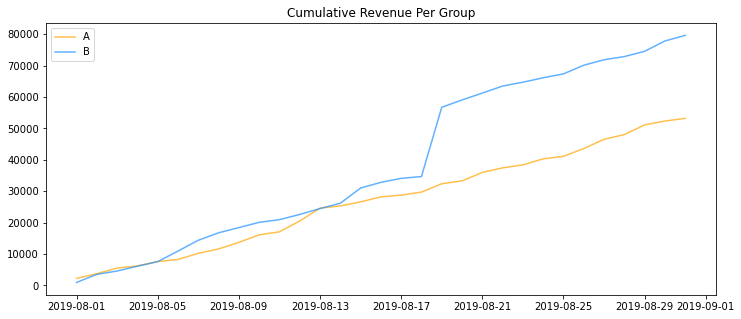

In [9]:
# Plotting the graphs
plt.figure(figsize = (12,5));
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A', color = 'orange', alpha = 0.7);
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B',color = 'dodgerblue', alpha = 0.7);
ax = plt.gca();
plt.legend();
plt.title('Cumulative Revenue Per Group');

<b>Observations and Conclusion :</b>  
    
We notice that for the first part of the study the cumulative value of the groups' revenue is almost the same, but after '2019-08-17' we notice that the gap between the two lines is growing that the group B is leading in terms of revenue, where at the end of the study period, group **A** had generated **53.2K dollars** while group **B** had generated **79.6K dollars**, that is a difference of **26.4K dollars**.
    
Therefore, we conclude that in terms of total income generated during the A/B testing period, **group B has generated the most revenue**.


###  3.2. Cumulative Average Order Size : <a name="32"></a>

We plot graphs of the cumulative average order size for each group.

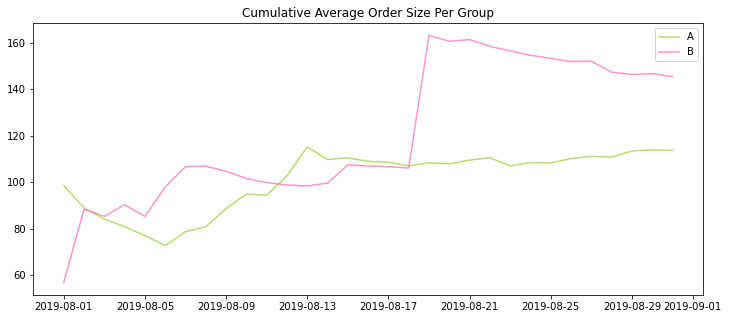

In [10]:
# Plotting the graphs
plt.figure(figsize = (12,5));
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A', color = 'yellowgreen', alpha = 0.7);
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B',color = 'hotpink', alpha = 0.7);
ax = plt.gca();
plt.legend();
plt.title('Cumulative Average Order Size Per Group');

<b>Observations and Conclusion :</b>  
    
We notice that for the first part of the study the cumulative value of the groups' revenue is fluctuating, but after '2019-08-17' we notice that group B knows a sudden surge in the cumulative average order size compared to group A, this is probably due to very large orders but we notice that it's facing a slow decline while group A is knowing a slow growth.
    
So we conclude that the cumulative average order size for group B is a lot higher than that of group A, but this makes us wonder if there are outliers distorting the results.

###  3.3. Relative Difference of the Cumulative Average Order Size Per Group : <a name="33"></a>

We plot a graph of the relative difference in cumulative average order size for group B compared with group A.

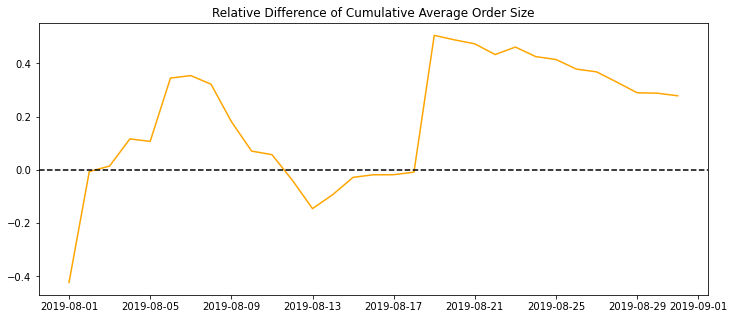

In [11]:
# Merging the data into one dataframe
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Plotting a relative difference graph for the average purchase size
plt.figure(figsize = (12,5));
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1, color = 'orange');
plt.title('Relative Difference of Cumulative Average Order Size');
# Adding the X axis
plt.axhline(y=0, color='black', linestyle='--') ;


<b>Observations and Conclusion :</b>  
    
We notice that the difference between the groups spikes at different points. It starts below 0, meaning that at this point the average size for group A was bigger, but then it rizes to almost 40%, to again drop down to almost -20% for a few days, then surge back to over 40% and gradually decline to 20%.
    
We conclude that the conversion ratio is not yet stable, so it's too early to draw conclusions about the test. Which means it is necessary to study the outliers which may be distorting the results.

###  3.4. Daily Conversion Rate Per Group : <a name="34"></a>

We calculate each group's conversion rate as the ratio of orders to the number of visits for each day.

---------------- Description of the Conversion Rate - Group A ----------------

count    31.000000
mean      0.025890
std       0.010295
min       0.011445
25%       0.017610
50%       0.023129
75%       0.031961
max       0.049861
Name: conversionRate, dtype: float64

---------------- Description of the Conversion Rate - Group B ----------------

count    31.000000
mean      0.030424
std       0.010792
min       0.009498
25%       0.023743
50%       0.031148
75%       0.035414
max       0.059621
Name: conversionRate, dtype: float64



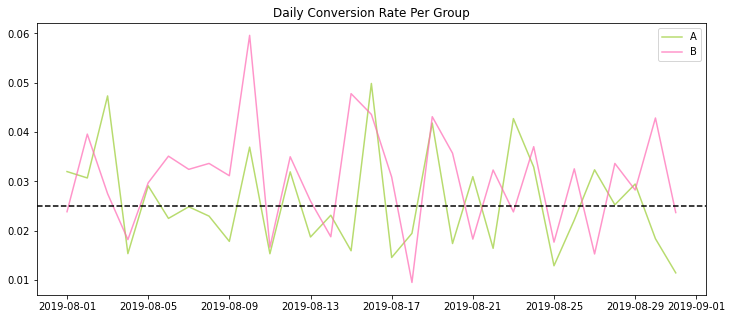

In [12]:
# Preparing a dataset to work with
dailyOrders = orders.groupby(['date','group'], as_index = False).agg({'transactionId' : 'nunique',
                                                   'revenue' : 'sum'})
dailyData = dailyOrders.merge(visits, how = 'left', left_on = ['date','group'], right_on = ['date','group'])

dailyData.columns = ['date', 'group', 'orders', 'revenue', 'visitors']

# Calculating the daily 'conversion' ratio 

dailyData['conversionRate'] = dailyData['orders'] / dailyData['visitors']

dailyDataA = dailyData.query ('group == "A"').reset_index(drop = True)
dailyDataB = dailyData.query ('group == "B"').reset_index(drop = True)

# Plotting the distribution
plt.figure(figsize = (12,5));
plt.plot(dailyDataA['date'], dailyDataA['conversionRate'], label='A', color = 'yellowgreen', alpha = 0.7);
plt.plot(dailyDataB['date'], dailyDataB['conversionRate'], label='B',color = 'hotpink', alpha = 0.7);
ax = plt.gca();
plt.legend();
plt.title('Daily Conversion Rate Per Group');

# Adding an X axis
plt.axhline(y =.025, color='black', linestyle='--') ;


# Information about the distributions
print('---------------- Description of the Conversion Rate - Group A ----------------')
print('')
print(dailyDataA['conversionRate'].describe())
print('')
print('---------------- Description of the Conversion Rate - Group B ----------------')
print('')
print(dailyDataB['conversionRate'].describe())
print('')

<b>Observations and Conclusion :</b>  
 
The average conversion ratio for **group A** is **2.6%**, while for **group B** it's **3%**. These values are regardless not reflecting the changes through time, which doesn't allow us to make any conclusions.

As seen on the graph above, we see that both groups know a very fluctuating ratio. The values for both groups are going through ups and downs throughout the study duration and still haven't fully stabilized but they are oscillating around the average of 2.6% which can be considered stable to a certain degree. This lets us conclude that there are good days where a big ratio of the visitors made orders, but also bad days where close to only 1% made an order, but in general the conversion rate is fluctuating around the same value of 2.6%.

###  3.5. Orders Per User : <a name="35"></a>

We study the number of orders made by each user.

----------------------------- Percentiles -----------------------------

90% of users have made : 1 order.

95% of users have made : 1 order.

99% of users have made : 2 orders.

-----------------------------------------------------------------------


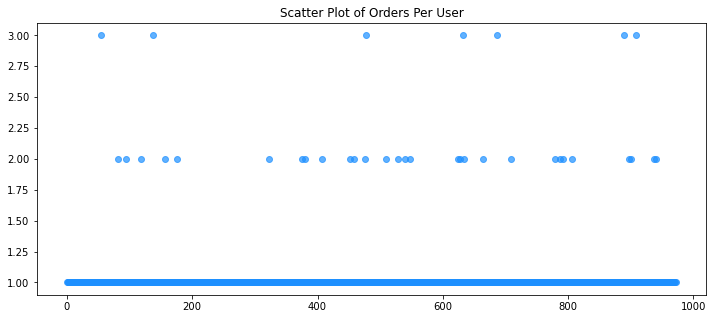

In [13]:
# Create an orders by user dataset
ordersByUsers = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique}))

ordersByUsers.columns = ['visitorId', 'orders']

# Plotting scatter plot
plt.figure(figsize = (12,5));
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'], color = 'dodgerblue', alpha = .7) ;
plt.title('Scatter Plot of Orders Per User');


# Percentiles
print('----------------------------- Percentiles -----------------------------')
print('')
print('90% of users have made : {:.0f} order.'.format(np.percentile(ordersByUsers['orders'], 90 )))
print('')
print('95% of users have made : {:.0f} order.'.format(np.percentile(ordersByUsers['orders'], 95 )))
print('')
print('99% of users have made : {:.0f} orders.'.format(np.percentile(ordersByUsers['orders'], 99 )))
print('')
print('-----------------------------------------------------------------------')

<b>Observations and Conclusion :</b>  
 
We observe from the scatter plot that the majority of the users have made 2 orders at most, but there are a few users that made 3 orders. Judging by the small amount of users that made 3 orders (7 out of 973, that is 0.7% of users), these might as well be anomalies, but to be more sure, we will need to examine the percentiles.  
    
The percentiles prove our pervious remark, 95% of the users made one order, 99% have made 2 orders or less and less than 1% of users has made 3 orders. **Therefore, we can consider any number above 2 orders an anomalie**.

###  3.6. Order Size Per User : <a name="36"></a>

,visitorId,orderSize
440,1920142716,19920.4
477,2108080724,3120.1
300,1307669133,1425.8
202,888512513,1335.6
176,759473111,1115.7
938,4133034833,1050.0
687,2988190573,1040.8
267,1164614297,1025.8
25,148427295,1015.9
200,887908475,930.0


----------------------------- Percentiles -----------------------------

90% of users have spent 284.16 dollars or less.

95% of users have spent 449.50 dollars or less.

99% of users have spent 912.58 dollars or less.

-----------------------------------------------------------------------


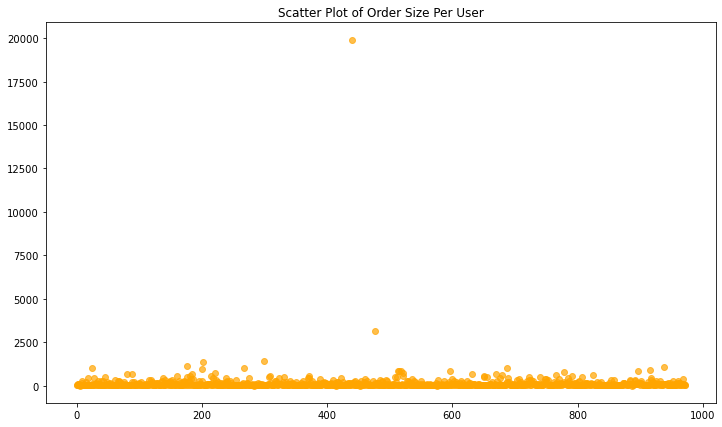

In [14]:
# Creating the revenue per user dataset 
revenueByUsers = (
    orders.drop(['group', 'transactionId', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'revenue': 'sum'}))

revenueByUsers.columns = ['visitorId', 'orderSize']

# Plotting scatter plot
plt.figure(figsize = (12,7));
x_values = pd.Series(range(0,len(revenueByUsers)))
plt.scatter(x_values, revenueByUsers['orderSize'], color = 'orange', alpha = .7) ;
plt.title('Scatter Plot of Order Size Per User');

# Display
display(revenueByUsers.sort_values(by = 'orderSize', ascending = False).head(10))

# Percentiles
print('----------------------------- Percentiles -----------------------------')
print('')
print('90% of users have spent {:.2f} dollars or less.'.format(np.percentile(revenueByUsers['orderSize'], 90 )))
print('')
print('95% of users have spent {:.2f} dollars or less.'.format(np.percentile(revenueByUsers['orderSize'], 95 )))
print('')
print('99% of users have spent {:.2f} dollars or less.'.format(np.percentile(revenueByUsers['orderSize'], 99 )))
print('')
print('-----------------------------------------------------------------------')

<b>Observations and Conclusion :</b>  
 
We observe from the scatter plot that the majority of the users have made orders smaller than 2500 dollars. To be precise, through the percentiles calculations, we see that 99% of the users have made orders 912.58 or smaller. **We can set the upper limit at 1000 dollars**, and consider all orders bigger than this limit outliers.

###  3.7. Comparison of Conversion Rates Between Groups - Raw Data : <a name="37"></a>

In this part, we will conduct a Mann-Whitney test to calculate the statistical significance of the difference in conversion between the groups using the raw data. 

So for our test, **the null hypothesis** will be the following : **"There is no difference between the conversion rate of both data samples"**. in this case the data samples refer to the 'group A' and the 'group B' from the intially provided data. **The alternative hypothesis** would then be : **"There is a difference between the conversion rates of both data samples"**, meaning that the conversion rate of one group is greater than the other.

In [15]:
# Creating the orders dataset by group
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique}))
ordersByUsersB.columns = ['visitorId', 'orders']

# Creating the samples taking into consideration the users that made no orders
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

# Mann-Whitney test
print('--------------------------------------------------------------------')
print('')
print("The p-value of the Mann-Whitney test is : {0:.5f}.".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('')
print("The relative conversion gain for group B is : {0:.3f}.".format(sampleB.mean()/sampleA.mean()-1)) 
print('')
print('--------------------------------------------------------------------')

--------------------------------------------------------------------

The p-value of the Mann-Whitney test is : 0.00551.

The relative conversion gain for group B is : 0.160.

--------------------------------------------------------------------


<b>Observations and Conclusion :</b>  
 
The resulting p-value from the Mann-Whitney test which compares the conversion rates is **0.00551**, which is considerably smaller than the alpha value of 0.05, therefore **we reject the null hypothesis**. The test on the raw data has led us to conclude that there is a statistically significant difference between the conversion rates of both groups and that there is a **16% relative conversion gain for group B compared to group A**.

###  3.8. Comparison of Average Order Size Between Groups - Raw Data : <a name="38"></a>

In this part, we will conduct a Mann-Whitney test to calculate the statistical significance of the difference in the average order size between the groups using the raw data. 

So for this test, **the null hypothesis** will be the following : **"There is no difference between the average order size of both data samples"**. **The alternative hypothesis** would then be : **"There is a difference between the average order sizes of both data samples"**, meaning that the average order size of one group is greater than the other.

In [16]:
print('--------------------------------------------------------------------')
print('')
print('The p-value of the Mann-Whitney test is : {0:.5f}'.format(stats.mannwhitneyu(orders[orders['group']=='B']['revenue'], orders[orders['group']=='A']['revenue'])[1]))
print('')
print('The relative gain in average order size for group B is : {0:.3f}'.format((orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean())-1)) 
print('')
print('--------------------------------------------------------------------')

--------------------------------------------------------------------

The p-value of the Mann-Whitney test is : 0.43112

The relative gain in average order size for group B is : 0.278

--------------------------------------------------------------------


<b>Observations and Conclusion :</b>  
 
The resulting p-value from the Mann-Whitney test which compares the average order size is **0.43112**, which is considerably bigger than the alpha value of 0.05, therefore **there is no reason to reject the null hypothesis**, this means that there is no statistical difference in the average order size.   
    
This Mann-Whitney test on the raw data has led us to conclude that there is no statistically significant difference between the average order size of both groups. Nonetheless, calculations show us that there is a **27.8% relative average order size gain for group B compared to group A**.


###  3.9. Comparison of Conversion Rates Between Groups - Filtered Data : <a name="39"></a>

In this part, we will conduct a Mann-Whitney test to calculate the statistical significance of the difference in conversion between the groups using the filtered data this time, and following the same principle as previously done.

The filtered data will be the data where we have removed the anomalies detected earlier in the study.

In [17]:
# Defining users with an abnormal number of orders : more than 2
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)

# Defining users with abnormaly expensive orders : worth more than 1000 $
usersWithExpensiveOrders = orders[orders['revenue'] > 10000]['visitorId']

# Adding the two datasets together
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

# Creating filtered samples
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

# Mann-Whitney test
print('--------------------------------------------------------------------')
print('')
print("The p-value of the Mann-Whitney test is : {0:.5f}.".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('')
print("The relative conversion gain for group B is : {0:.3f}.".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 
print('')
print('--------------------------------------------------------------------')

--------------------------------------------------------------------

The p-value of the Mann-Whitney test is : 0.00439.

The relative conversion gain for group B is : 0.183.

--------------------------------------------------------------------


<b>Observations and Conclusion :</b>  
 
As happened with the raw data, the resulting p-value from the Mann-Whitney test which compares the conversion rates on the filtered data is **0.00439**, which is considerably smaller than the alpha value of 0.05, therefore **we reject the null hypothesis** again. The test on the filtered data confirms further that group B is better than group A, and there is a **18.3% relative conversion gain for group B compared to group A**.</div>

###  3.10. Comparison of Average Order Size Between Groups - Filtered Data : <a name="310"></a>

This time, we will find the statistical significance of the difference in average order size between the groups using the filtered data.

In [18]:
print('--------------------------------------------------------------------')
print('')
print('The p-value of the Mann-Whitney test is : {0:.5f}'.format(
    stats.mannwhitneyu(orders[np.logical_and(orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],orders[np.logical_and(
        orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))
print('')
print('The relative gain in average order size for group B is : {0:.3f}'.format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))
print('')
print('--------------------------------------------------------------------')

--------------------------------------------------------------------

The p-value of the Mann-Whitney test is : 0.35527

The relative gain in average order size for group B is : -0.042

--------------------------------------------------------------------


<b>Observations and Conclusion :</b>  
 
The resulting p-value from the Mann-Whitney test which compares the average order size on the filtered data is **0.35527**, which is still considerably bigger than the alpha value of 0.05, therefore it confirms that just like with the raw data, **there is no reason to reject the null hypothesis**, which means that **there is no statistical difference in the average order size between both groups**.   
    
On the other hand, filtering the outliers has removed noise from the data, and lead to a more coherent observation on the average order size, where this time, we observe that **there is a drop of 4.2% in the average order size in group B compared to group A**.

###  3.11. Final Conclusion : <a name="311"></a>

Before we can conclude on the A/B test, we will plot the graph of the relative gain in conversion rate and in average order size for the filtered data.

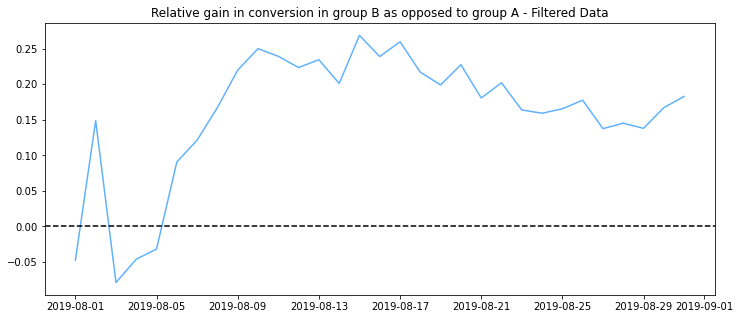

In [19]:
# Filtered data
orders_ = orders[~orders.visitorId.isin(abnormalUsers)]

# Array with unique paired date-group values
datesGroups = orders_[['date','group']].drop_duplicates()

# Aggregated cumulative daily data on filtered orders dataset
ordersAggregated_ = datesGroups.apply(
    lambda x: orders_[
        np.logical_and(orders_['date'] <= x['date'], orders_['group'] == x['group'])
    ].agg({'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum',}),axis = 1,).sort_values(by=['date', 'group'])


# Merging the two table into the cumulative data dataframe
cumulativeData_ = ordersAggregated_.merge( visitsAggregated, left_on = ['date', 'group'], right_on = ['date', 'group'])

# Renaming columns
cumulativeData_.columns = ['date','group','orders','buyers','revenue','visitors']

# calculating cumulative conversion
cumulativeData_['conversion'] = cumulativeData_['orders']/cumulativeData_['visitors']

# selecting data on group A 
cumulativeDataA_ = cumulativeData_[cumulativeData_['group']=='A']

# selecting data on group B
cumulativeDataB_ = cumulativeData_[cumulativeData_['group']=='B']

# Merging the two data slices
mergedCumulativeConversions_ = cumulativeDataA_[['date','conversion']].merge(
    cumulativeDataB_[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Plotting
plt.figure(figsize = (12,5));
plt.plot(mergedCumulativeConversions_['date'], 
         mergedCumulativeConversions_['conversionB']/mergedCumulativeConversions_['conversionA']-1 , 
         color = 'dodgerblue', alpha = .7);
plt.axhline(y=0, color='black', linestyle='--');
plt.title('Relative gain in conversion in group B as opposed to group A - Filtered Data');


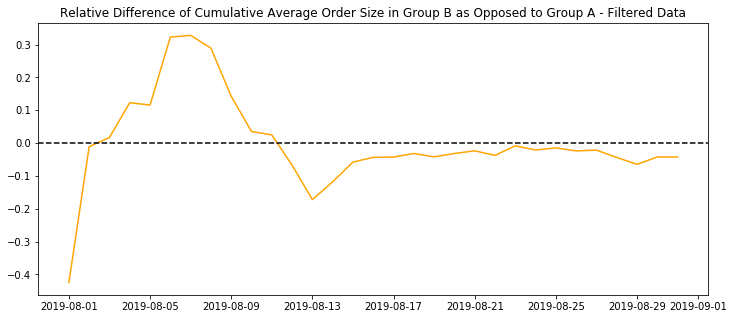

In [19]:
# Calculating cumulative revenue for filtered data
cumulativeRevenueA_ = cumulativeData_[cumulativeData_['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB_ = cumulativeData_[cumulativeData_['group']=='B'][['date','revenue', 'orders']]

# Merging the data into one dataframe
mergedCumulativeRevenue_ = cumulativeRevenueA_.merge(cumulativeRevenueB_, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Plotting a relative difference graph for the average purchase size
plt.figure(figsize = (12,5));
plt.plot(mergedCumulativeRevenue_['date'], (mergedCumulativeRevenue_['revenueB']/mergedCumulativeRevenue_['ordersB'])/(mergedCumulativeRevenue_['revenueA']/mergedCumulativeRevenue_['ordersA'])-1, color = 'orange');
plt.title('Relative Difference of Cumulative Average Order Size in Group B as Opposed to Group A - Filtered Data');
# Adding the X axis
plt.axhline(y=0, color='black', linestyle='--') ;


<b>Observations and Conclusion :</b>  
 
The facts that we so far have come to :
- Both the raw and the filtered data revealed that there is a statistically significant difference in conversion between the groups. We found that **group B has a higher conversion rate by 18.3% compared to group A**, meaning that **the users of group B, made more orders**.
- The raw data showed that there is no statistically significant difference between the groups in terms of average purchase size, but there is a 27.8% relative average order size gain for group B compared to group A. However, after the anomalies were removed, the filtered data confirms that there is no statistically significant difference and this is further confirmed by the **small relative difference in average purchase size between group B and A, where there is a loss of 4.2%**.
- The graph of the difference in conversion between the groups shows that group B's results are better than those of group A: although not fully stable but they are fluctuating around the values of approximately 15%.
- The graph of the difference in average purchase size has stabilized at a value below 0 : The average purchase size in group B for the filtered data is relatively 4.2% smaller than that of group A.
    
**Therefore, our final conclusion will be that although the test so far looks like a success and is showing hopeful results, the safer decision would be to give the test a couple of more weeks, to let the conversion rate stabilize, and also examine if there will be any changes happening to the average purchase size.**